In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz system equations
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10
beta_values = np.linspace(0, 40, 250)
rho = 28  # Range of rho values
x_values = []
y_values = []
z_values = []  # To store z values for the bifurcation diagram

# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Solve the Lorenz system for each rho value
for beta in beta_values:
    # Solve the system
    sol = solve_ivp(lorenz_system, [0, 50], initial_state, args=(sigma, rho, beta), t_eval=np.linspace(40, 50, 1000))
    
    # Discard the transient and keep the last 100 z values
    x_values.append(sol.y[0][-100:])
    y_values.append(sol.y[1][-100:])
    z_values.append(sol.y[2][-100:])
    #print(sol.y[0][:10])
# Flatten the z_values list for plotting
x_values = np.array(x_values).flatten()
y_values = np.array(y_values).flatten()
z_values = np.array(z_values).flatten()

In [34]:
len([test for test in range(-25, 26)])

51

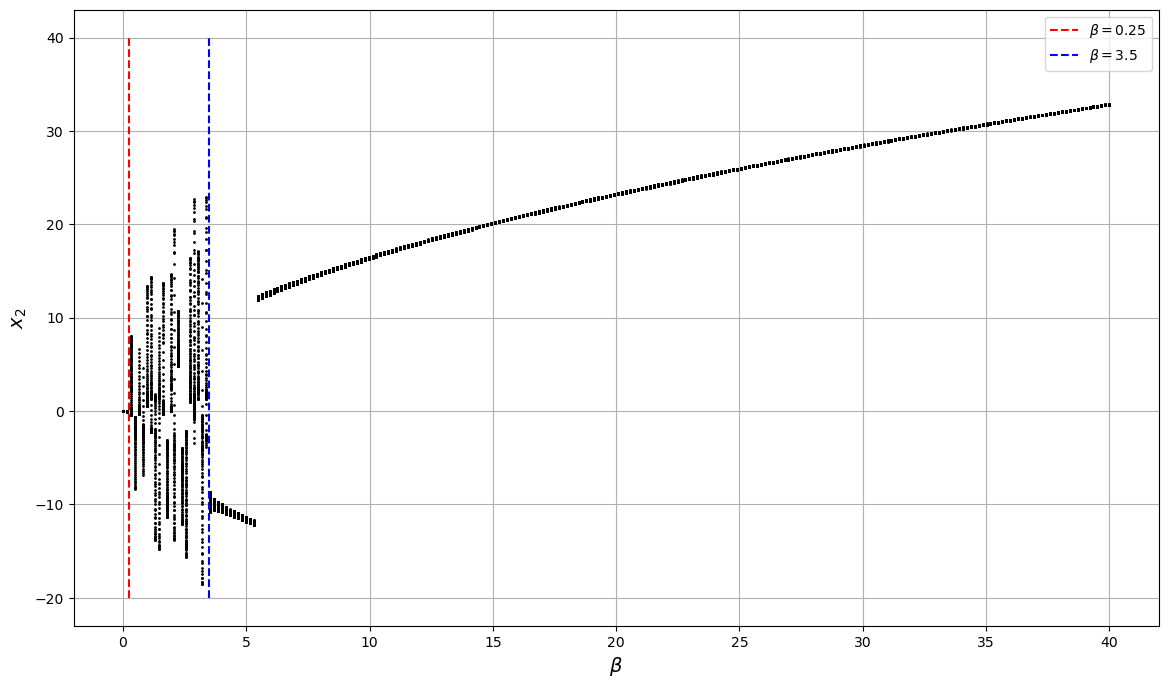

In [45]:
# Create the bifurcation diagram
plt.figure(figsize=(14, 8))
#plt.plot(np.repeat(beta_values, 100), x_values, '.', markersize=2, color='black')
plt.plot(np.repeat(beta_values, 100), y_values, '.', markersize=2, color='black')
#plt.plot(np.repeat(beta_values, 100), z_values, '.', markersize=2, color='black')
plt.plot([0.25]*61, [z for z in range(-20, 41)], c="r", linestyle="dashed", label=r'$\beta = 0.25$')
plt.plot([3.5]*61, [z for z in range(-20, 41)], c="b", linestyle="dashed", label=r'$\beta = 3.5$')
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
# plt.title('Bifurcation Diagram of the Lorenz System', fontsize=16)
plt.grid(True)
plt.legend()
plt.savefig('lorenz_bifurcation_beta2.pdf', dpi=360, bbox_inches='tight')
plt.show()

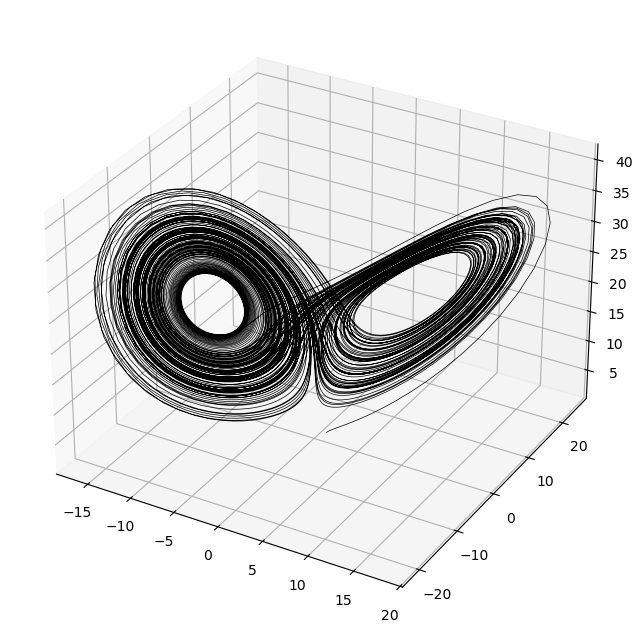

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Lorenz system equations
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters for the Lorenz system
sigma = 10
rho = 24.73
beta = 8/3

# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Time span for integration
t_span = (0, 150)
t_eval = np.linspace(0, 150, 10000)

# Solve the Lorenz system
sol = solve_ivp(lorenz_system, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)

# Extract the solution
x, y, z = sol.y

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Lorenz attractor
ax.plot(x, y, z, lw=0.5, color='black')
# ax.set_xlabel('$x_1$', fontsize=14)
# ax.set_ylabel('$x_2$', fontsize=14)
# ax.set_zlabel('$x_3$', fontsize=14)
# ax.set_title('3D Lorenz Attractor', fontsize=16)

# Save the plot
plt.savefig('l1.pdf', dpi=360, bbox_inches='tight')

# Show the plot
plt.show()

In [9]:
import sympy as sp

# Define symbols
x1, x2, x3 = sp.symbols('x1 x2 x3', real=True)
i = sp.I  # Complex unit

# Define A
A = (0.00268 * x1**2 + 0.2786 + 0.00493 * x1 * x2 - 0.00931 * x3 +
     sp.sqrt((-0.00330 * x1**2 - 0.0330 * x3 + 1)**3 + 0.0776 * (0.00963 * x1**2 + 0.0177 * x1 * x2 - 0.0334 * x3 + 1)**2))

# Define lambda expressions
lambda_1 = -0.0111 * (-3*x1**2 - 30*x3 + 908.78) / A**(1/3) - 10.0486 * A**(1/3) - 4.5556
lambda_2 = -0.0111 * ((-0.5 - 0.866*i) * (-3*x1**2 - 30*x3 + 908.78)) / A**(1/3) - 10.0486 * (-0.5 + 0.866*i) * A**(1/3) - 4.5556
lambda_3 = -0.0111 * ((-0.5 + 0.866*i) * (-3*x1**2 - 30*x3 + 908.78)) / A**(1/3) - 10.0486 * (-0.5 - 0.866*i) * A**(1/3) - 4.5556

# Given parameters
sigma = 10
rho = 28
beta = 8/3

# # Compute values of (x1, x2, x3)
# x1_val = 0
# x2_val = 0
# x3_val = 0

x1_val = sp.sqrt(beta * (rho - 1))
x2_val = sp.sqrt(beta * (rho - 1))
x3_val = rho - 1

# x1_val = -sp.sqrt(beta * (rho - 1))
# x2_val = -sp.sqrt(beta * (rho - 1))
# x3_val = rho - 1

# Substitute values into lambda expressions
lambda_1_val = lambda_1.subs({x1: x1_val, x2: x2_val, x3: x3_val}).evalf()
lambda_2_val = lambda_2.subs({x1: x1_val, x2: x2_val, x3: x3_val}).evalf()
lambda_3_val = lambda_3.subs({x1: x1_val, x2: x2_val, x3: x3_val}).evalf()

# Display results
lambda_1_val, lambda_2_val, lambda_3_val


(-13.8374334833795,
 0.085316741689727 - 10.1898085981571*I,
 0.085316741689727 + 10.1898085981571*I)

In [52]:
(-13.8374334833795,
 0.085316741689727 - 10.1898085981571*I,
 0.085316741689727 + 10.1898085981571*I)

Matrix([
[   -sigma, sigma,     0],
[rho - x_3,    -1,  -x_1],
[      x_2,   x_1, -beta]])

In [58]:
eigenvalues

{(0, 0, 0): [-sigma/2 - sqrt(4*rho*sigma + sigma**2 - 2*sigma + 1)/2 - 1/2,
  -sigma/2 + sqrt(4*rho*sigma + sigma**2 - 2*sigma + 1)/2 - 1/2,
  -beta],
 (-sqrt(beta*rho - beta),
  -sqrt(beta*(rho - 1)),
  rho - 1): [-beta/3 - sigma/3 - (-3*beta*rho - 3*beta*sigma + (beta + sigma + 1)**2)/(3*(27*beta*rho*sigma - 27*beta*sigma - (beta*rho + beta*sigma)*(9*beta + 9*sigma + 9)/2 + sqrt(-4*(-3*beta*rho - 3*beta*sigma + (beta + sigma + 1)**2)**3 + (54*beta*rho*sigma - 54*beta*sigma - (beta*rho + beta*sigma)*(9*beta + 9*sigma + 9) + 2*(beta + sigma + 1)**3)**2)/2 + (beta + sigma + 1)**3)**(1/3)) - (27*beta*rho*sigma - 27*beta*sigma - (beta*rho + beta*sigma)*(9*beta + 9*sigma + 9)/2 + sqrt(-4*(-3*beta*rho - 3*beta*sigma + (beta + sigma + 1)**2)**3 + (54*beta*rho*sigma - 54*beta*sigma - (beta*rho + beta*sigma)*(9*beta + 9*sigma + 9) + 2*(beta + sigma + 1)**3)**2)/2 + (beta + sigma + 1)**3)**(1/3)/3 - 1/3, -beta/3 - sigma/3 - (-3*beta*rho - 3*beta*sigma + (beta + sigma + 1)**2)/(3*(-1/2 + sqrt(3)

In [66]:
import sympy as sp

# Define the variable
lambda_ = sp.Symbol('lambda')

# Define the equation
eq = -lambda_**3 - (41/3)*lambda_**2 - lambda_*x1**2 - 10*lambda_*x3 + (722/3)*lambda_ - 10*x1**2 - 10*x1*x2 - (80/3)*x3 + 720

# Solve for lambda
solutions = sp.solve(eq, lambda_)
print(sp.latex(solutions))


\left[ - \frac{0.0110573204481618 \left(- 3.0 x_{1}^{2} - 30.0 x_{3} + 908.777777777778\right)}{\sqrt[3]{0.00268287717684033 x_{1}^{2} + 0.00492773359011489 x_{1} x_{2} - 0.00930794122577257 x_{3} + \left(- \left(- 0.00330113705832009 x_{1}^{2} - 0.0330113705832009 x_{3} + 1\right)^{3} + 0.0776406340841389 \left(0.00962844722184486 x_{1}^{2} + 0.0176849030605314 x_{1} x_{2} - 0.0334048168921148 x_{3} + 1\right)^{2}\right)^{0.5} + 0.278640689929053}} - 10.0486471050572 \sqrt[3]{0.00268287717684033 x_{1}^{2} + 0.00492773359011489 x_{1} x_{2} - 0.00930794122577257 x_{3} + \left(- \left(- 0.00330113705832009 x_{1}^{2} - 0.0330113705832009 x_{3} + 1\right)^{3} + 0.0776406340841389 \left(0.00962844722184486 x_{1}^{2} + 0.0176849030605314 x_{1} x_{2} - 0.0334048168921148 x_{3} + 1\right)^{2}\right)^{0.5} + 0.278640689929053} - 4.55555555555556, \  - \frac{0.0110573204481618 \left(-0.5 - 0.866025403784439 i\right) \left(- 3.0 x_{1}^{2} - 30.0 x_{3} + 908.777777777778\right)}{\sqrt[3]{0.0026828